## Import packages

In [1]:
import warnings 
warnings.filterwarnings("ignore") 
from ml_class_utils import *

Shape: (891, 12)
-----------------
PassengerId --> Type:num | Nas: 0(0%) | Min-Max: (1)-(891) | Possible PK
Survived --> Type:cat | Nas: 0(0%) | Categories: 2
Pclass --> Type:cat | Nas: 0(0%) | Categories: 3
Name --> Type:cat | Nas: 0(0%) | Categories: 891 | Possible PK
Sex --> Type:cat | Nas: 0(0%) | Categories: 2
Age --> Type:num | Nas: 177(19%) | Min-Max: (0)-(80)
SibSp --> Type:cat | Nas: 0(0%) | Categories: 7
Parch --> Type:cat | Nas: 0(0%) | Categories: 7
Ticket --> Type:cat | Nas: 0(0%) | Categories: 681
Fare --> Type:num | Nas: 0(0%) | Min-Max: (0)-(512)
Cabin --> Type:cat | Nas: 687(77%) | Categories: 147
Embarked --> Type:cat | Nas: 2(0%) | Categories: 3


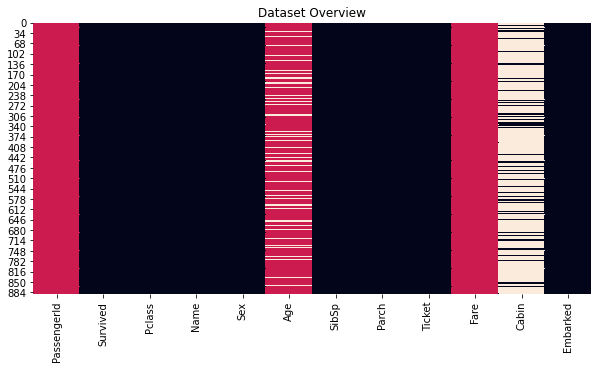

 Categerocial   Numerical   NaN 


In [2]:
# Import the data
dtf = pd.read_csv("data_titanic.csv")
dtf.head()
dtf_overview(dtf,max_cat=20,figsize=(10,5))

In [3]:
dtf = dtf.set_index("PassengerId")
dtf = dtf.rename(columns={"Survived":"y"})

In [4]:
dtf

,y,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


## 1. Data analysis

####### Group variables by info
- Who: Sex,Age,Embarked (Which port C=Cherbourg,Q=Queenstown,S=Southampton)
- Wealth: Pclass,Ticket,Fare
- Where Cabin
- How many: Sibp (With Siblings/Spouse), Parch (With Parent/Children)


In [5]:
features = []

### Target Variable

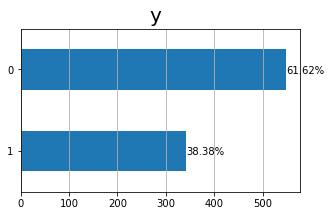

In [6]:
freqdist_plot(dtf,"y",figsize=(5,3))
# 0 represents those who did'nt survive
# 1 represents those who did survive

--- WARNING: Factorizing 891 labels of Name ---
--- WARNING: Factorizing 2 labels of Sex ---
--- WARNING: Factorizing 681 labels of Ticket ---
--- WARNING: Factorizing 147 labels of Cabin ---
--- WARNING: Factorizing 3 labels of Embarked ---


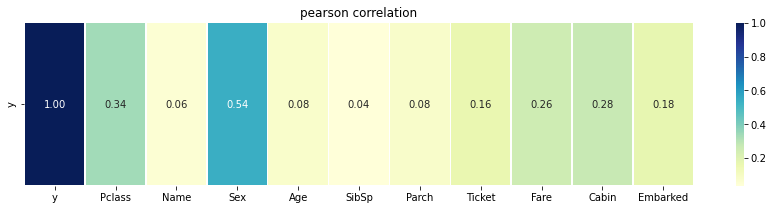

In [7]:
corr = corr_matrix(dtf,method="pearson",negative=False,
                  lst_filters=["y"],figsize=(15,3))

--- got error ---
rename() got an unexpected keyword argument 'columns'


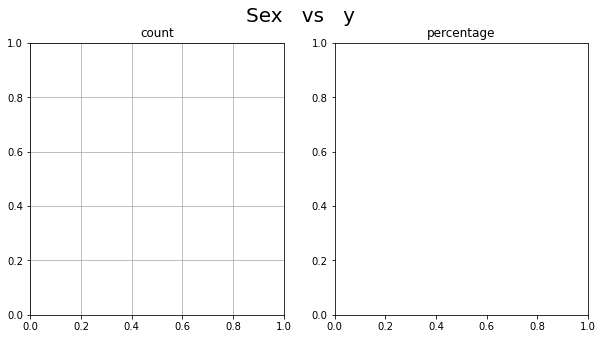

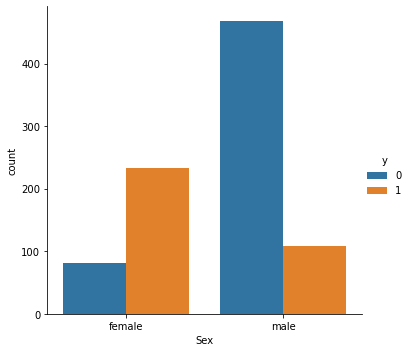

In [8]:
# Analyzing Sex
bivariate_plot(dtf,x="Sex",y="y", figsize=(10,5))

In [9]:
coeff, p = test_corr(dtf,x="Sex",y="y")

Cramer Correlation: 0.54 Significant (p-value: 0.0)


In [10]:
features.append("Sex")

--- got error ---
rename() got an unexpected keyword argument 'columns'


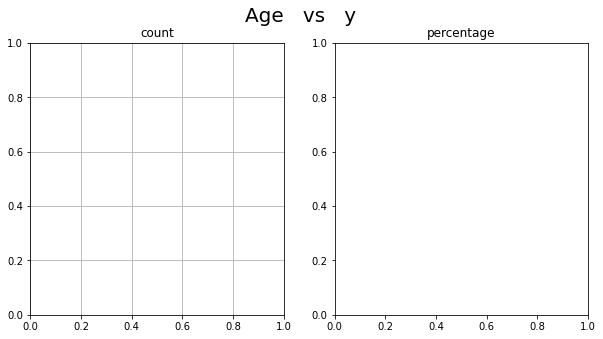

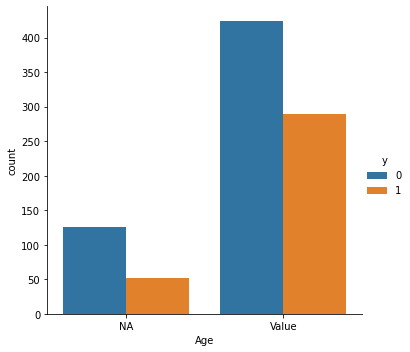

In [11]:
# Analyzing Age
nan_analysis(dtf,na_x="Age",y="y", max_cat=20,figsize=(10,5))

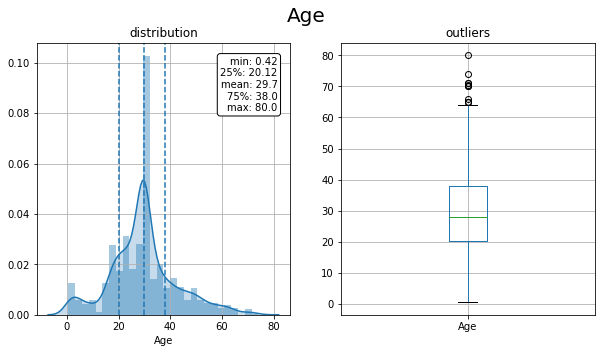

In [12]:
freqdist_plot(dtf,"Age",figsize=(10,5))

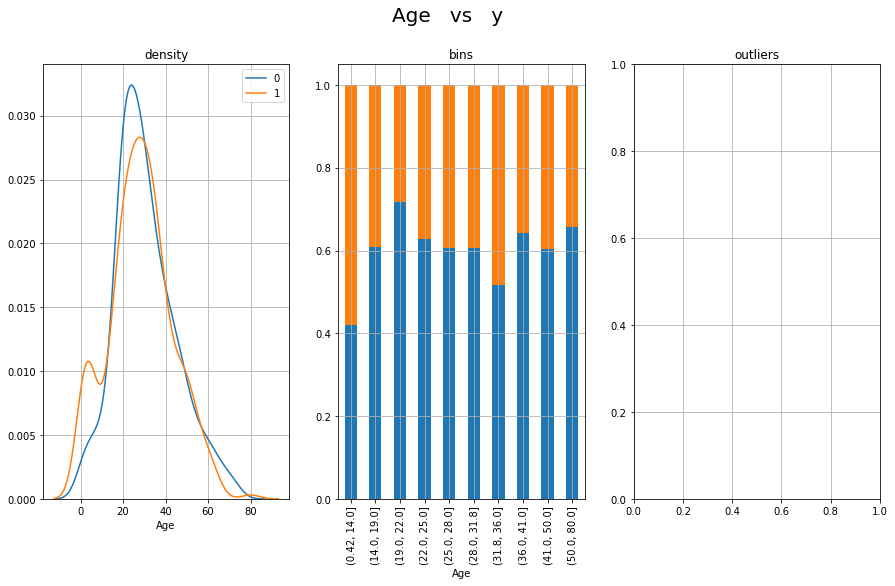

In [13]:
bivariate_plot(dtf,x="Age",y="y", figsize=(15,8))

In [14]:
features.append("Age")

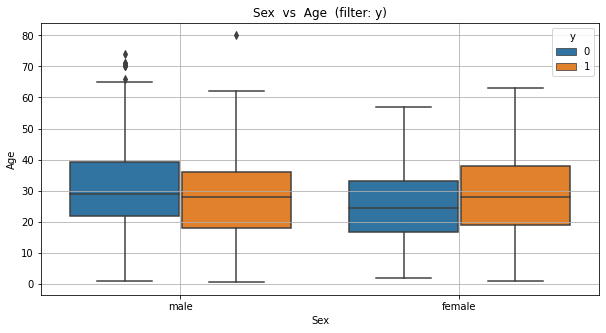

In [15]:
cross_distributions(dtf, x1="Sex",x2="Age",y="y",figsize=(10,5))

--- got error ---
rename() got an unexpected keyword argument 'columns'


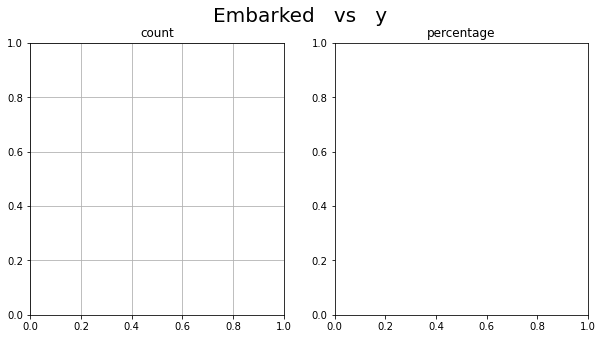

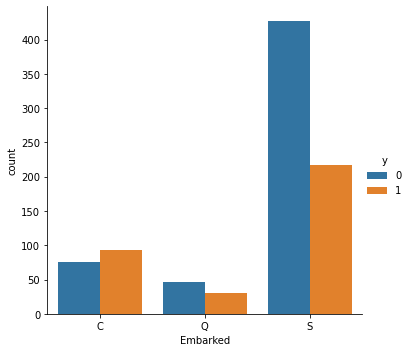

In [16]:
bivariate_plot(dtf, x="Embarked", y="y", figsize=(10, 5))

In [17]:
coeff, p = test_corr(dtf,x="Embarked",y="y")

Cramer Correlation: 0.166 Significant (p-value: 0.0)


In [18]:
features.append("Embarked")

#### Wealth, Pclass, Ticket , Fare

--- got error ---
rename() got an unexpected keyword argument 'columns'


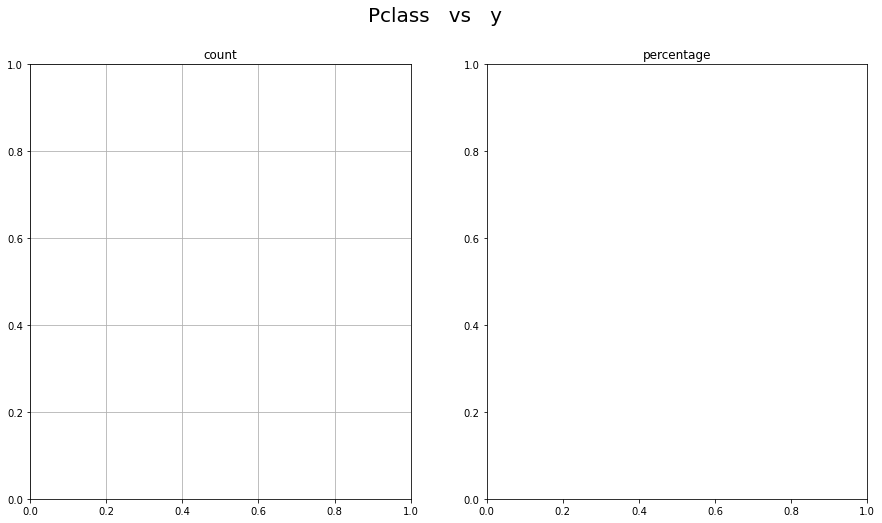

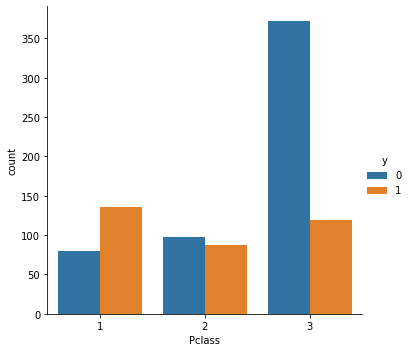

In [19]:
bivariate_plot(dtf,x="Pclass",y="y", figsize=(15,8))

In [20]:
coeff, p = test_corr(dtf,x="Pclass",y="y")

Cramer Correlation: 0.337 Significant (p-value: 0.0)


In [21]:
features.append("Pclass")

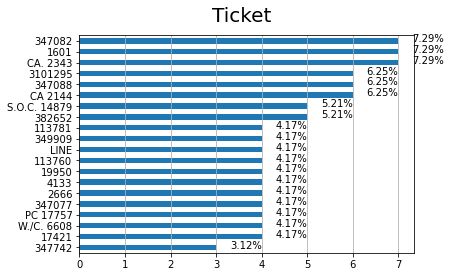

In [22]:
freqdist_plot(dtf,"Ticket",figsize=(6,4))

In [23]:
coeff, p = test_corr(dtf,x="Ticket",y="y")

Cramer Correlation: 0.311 Significant (p-value: 0.012)


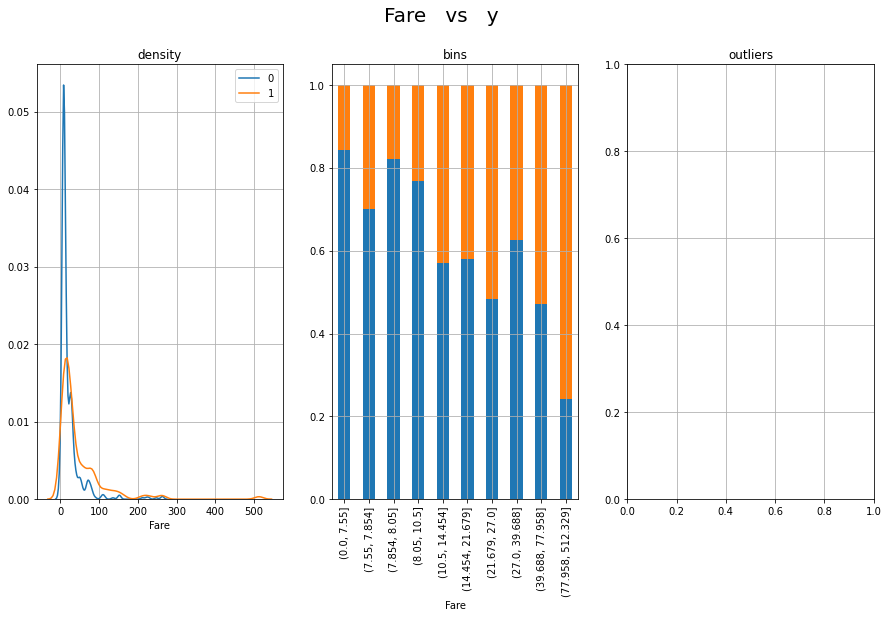

In [24]:
bivariate_plot(dtf,x="Fare",y="y", figsize=(15,8))

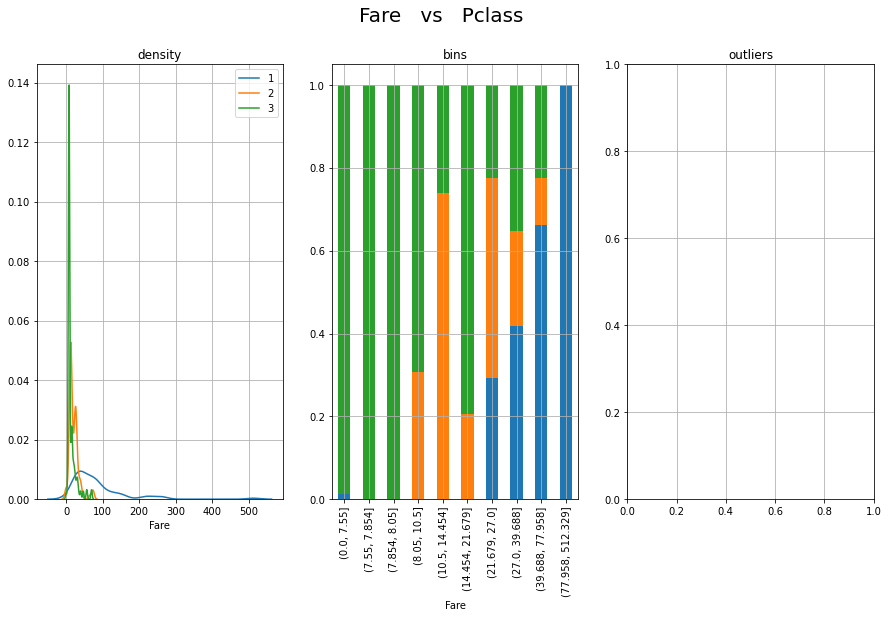

In [25]:
bivariate_plot(dtf,x="Fare",y="Pclass", figsize=(15,8))

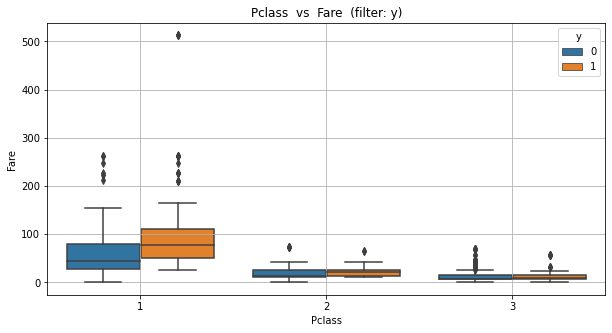

In [26]:
cross_distributions(dtf, x1="Pclass",x2="Fare",y="y",figsize=(10,5))

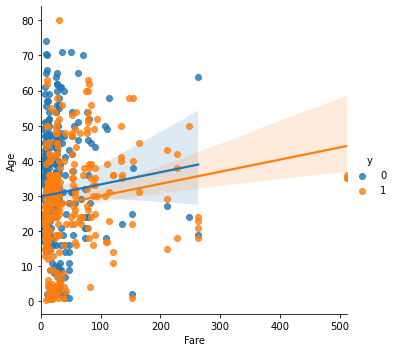

In [27]:
cross_distributions(dtf, x1="Fare",x2="Age",y="y",figsize=(10,5))

In [28]:
features.append("Fare")

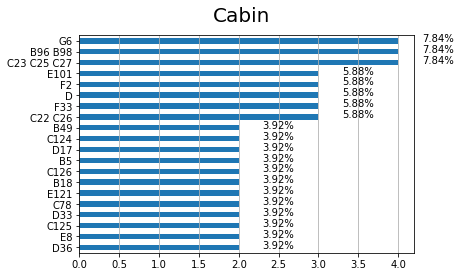

In [29]:
freqdist_plot(dtf,"Cabin",figsize=(6,4))

--- got error ---
rename() got an unexpected keyword argument 'columns'


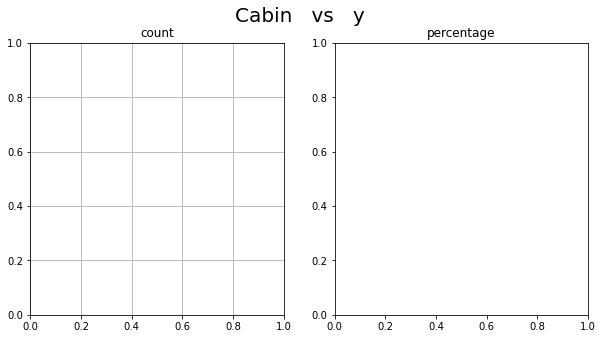

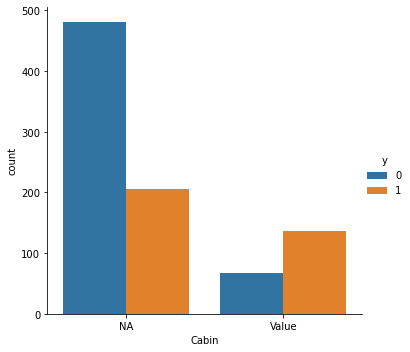

In [30]:
nan_analysis(dtf,na_x="Cabin",y="y", max_cat=20,figsize=(10,5))

In [31]:
dtf["Cabin_section"] = dtf["Cabin"].apply(lambda x: str(x)[0])

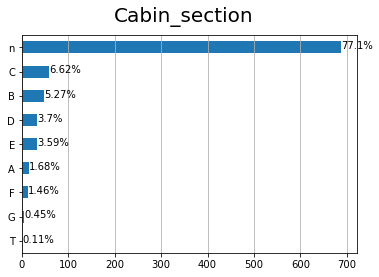

In [32]:
freqdist_plot(dtf,"Cabin_section",figsize=(6,4))

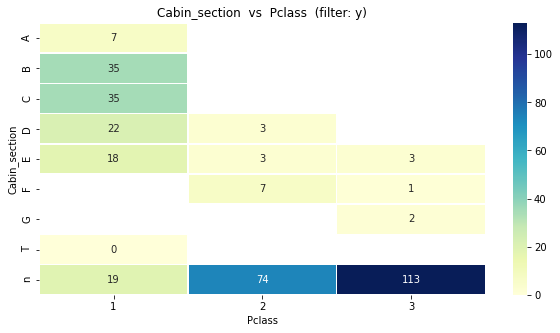

In [33]:
cross_distributions(dtf, x1="Cabin_section",x2="Pclass",y="y",figsize=(10,5))

In [34]:
coeff, p = test_corr(dtf,x="Cabin_section",y="y")

Cramer Correlation: 0.32 Significant (p-value: 0.0)


In [35]:
features.append("Cabin_section")

--- got error ---
rename() got an unexpected keyword argument 'columns'


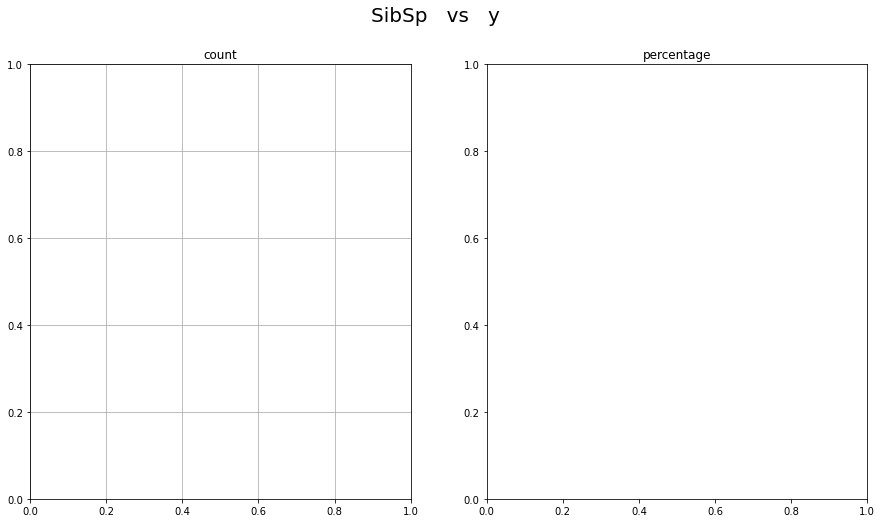

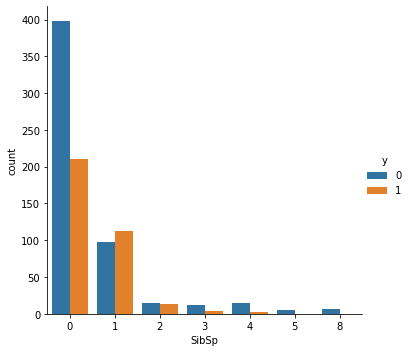

In [36]:
###### How many? SibSp, ParCh
bivariate_plot(dtf,x="SibSp",y="y", figsize=(15,8))

In [37]:
coeff, p = test_corr(dtf,x="SibSp",y="y")

Cramer Correlation: 0.187 Significant (p-value: 0.0)


In [38]:
features.append("SibSp")

--- got error ---
rename() got an unexpected keyword argument 'columns'


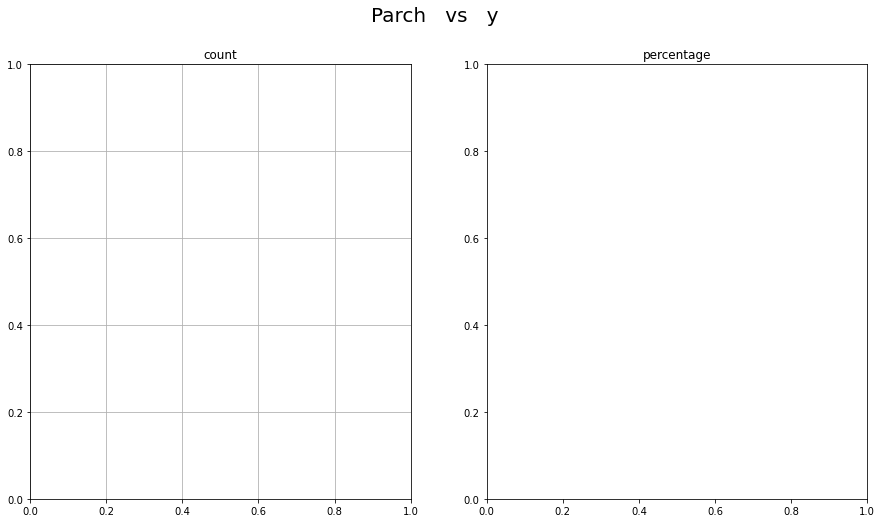

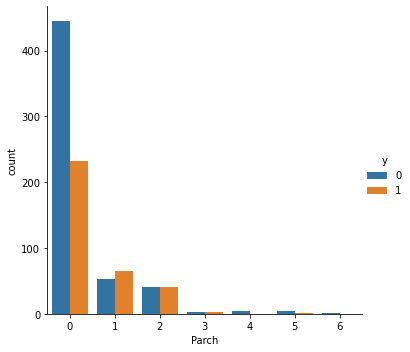

In [39]:
bivariate_plot(dtf,x="Parch",y="y", figsize=(15,8))

In [40]:
coeff, p = test_corr(dtf,x="Parch",y="y")

Cramer Correlation: 0.157 Significant (p-value: 0.0)


In [41]:
features.append("Parch")

In [42]:
features

['Sex', 'Age', 'Embarked', 'Pclass', 'Fare', 'Cabin_section', 'SibSp', 'Parch']

In [43]:
# Summary
dtf = dtf[features+["y"]]
dtf.head()

,Sex,Age,Embarked,Pclass,Fare,Cabin_section,SibSp,Parch,y
PassengerId,,,,,,,,,
1,male,22.0,S,3,7.2500,n,1,0,0
2,female,38.0,C,1,71.2833,C,1,0,1
3,female,26.0,S,3,7.9250,n,0,0,1
4,female,35.0,S,1,53.1000,C,1,0,1
5,male,35.0,S,3,8.0500,n,0,0,0


# 2. Preprocessing

# To do
- Data Partitioning
- Resample
- Treat Missing Values
- Encode Categorical Data
- Scaling
- Preprocess Test Data

In [44]:
check = data_preprocessing(dtf,y="y")

--- check missing ---
--- check categorical data ---
--- split train/test ---
   OK: step skipped
--- scaling ---
   OK: step skipped


### Partitioning

In [45]:
dtf_train,dtf_test = dtf_partitioning(dtf,y="y",test_size = 0.3,shuffle=False)

X_train shape: (623, 8) | X_test shape: (268, 8)
y_train mean: 0.39 | y_test mean: 0.36
9 features: ['Sex', 'Age', 'Embarked', 'Pclass', 'Fare', 'Cabin_section', 'SibSp', 'Parch']


In [46]:
dtf_train.head()

,Sex,Age,Embarked,Pclass,Fare,Cabin_section,SibSp,Parch,y
PassengerId,,,,,,,,,
1,male,22.0,S,3,7.2500,n,1,0,0
2,female,38.0,C,1,71.2833,C,1,0,1
3,female,26.0,S,3,7.9250,n,0,0,1
4,female,35.0,S,1,53.1000,C,1,0,1
5,male,35.0,S,3,8.0500,n,0,0,0


In [47]:
dtf_test.head()

,Sex,Age,Embarked,Pclass,Fare,Cabin_section,SibSp,Parch,y
PassengerId,,,,,,,,,
624,male,21.0,S,3,7.8542,n,0,0,0
625,male,21.0,S,3,16.1000,n,0,0,0
626,male,61.0,S,1,32.3208,D,0,0,0
627,male,57.0,Q,2,12.3500,n,0,0,0
628,female,21.0,S,1,77.9583,D,0,0,1


### Resampling Training Data

In [48]:
check = rebalance(dtf,y="y")

--- situation ---
     y      %
0  549  61.6%
1  342  38.4%
tot: 891


### Fill The Missing Data

In [49]:
dtf_train,age_mean = fill_na(dtf_train,x= "Age")

--- Replacing Nas with: 29.78048780487805 ---


In [50]:
dtf_train,embarked_mode = fill_na(dtf_train,x= "Embarked")

--- Replacing Nas with: S ---


### Categorical Encoding

In [51]:
dtf_train = add_dummies(dtf_train,x="Sex",dropx=True)

                Sex  Sex_male
PassengerId                  
1              male         1
2            female         0
3            female         0
4            female         0
5              male         1


In [52]:
dtf_train = add_dummies(dtf_train,x="Embarked",dropx=True)

            Embarked  Embarked_Q  Embarked_S
PassengerId                                 
1                  S           0           1
2                  C           0           0
3                  S           0           1
4                  S           0           1
5                  S           0           1


In [53]:
dtf_train = add_dummies(dtf_train,x="Cabin_section",dropx=True)

            Cabin_section  Cabin_section_B  Cabin_section_C  Cabin_section_D  \
PassengerId                                                                    
1                       n                0                0                0   
2                       C                0                1                0   
3                       n                0                0                0   
4                       C                0                1                0   
5                       n                0                0                0   

             Cabin_section_E  Cabin_section_F  Cabin_section_G  \
PassengerId                                                      
1                          0                0                0   
2                          0                0                0   
3                          0                0                0   
4                          0                0                0   
5                          0               

In [54]:
dtf_train = add_dummies(dtf_train,x="Pclass",dropx=True)

             Pclass  Pclass_2  Pclass_3
PassengerId                            
1                 3         0         1
2                 1         0         0
3                 3         0         1
4                 1         0         0
5                 3         0         1


In [55]:
dtf_train = pop_columns(dtf_train,["y"],where="end")
dtf_train.head()

,Age,Fare,SibSp,Parch,Sex_male,Embarked_Q,Embarked_S,Cabin_section_B,Cabin_section_C,Cabin_section_D,Cabin_section_E,Cabin_section_F,Cabin_section_G,Cabin_section_T,Cabin_section_n,Pclass_2,Pclass_3,y
PassengerId,,,,,,,,,,,,,,,,,,
1,22.0,7.2500,1,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0
2,38.0,71.2833,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
3,26.0,7.9250,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,1
4,35.0,53.1000,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1
5,35.0,8.0500,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0


###  Perform Scaling on the Data

In [56]:
scaler = preprocessing.MinMaxScaler(feature_range=(0,1))

In [57]:
dtf_train,scaler = scaling(dtf_train,y="y",scalerX=scaler,task="classification")

In [58]:
dtf_train.head()

,Age,Fare,SibSp,Parch,Sex_male,Embarked_Q,Embarked_S,Cabin_section_B,Cabin_section_C,Cabin_section_D,Cabin_section_E,Cabin_section_F,Cabin_section_G,Cabin_section_T,Cabin_section_n,Pclass_2,Pclass_3,y
PassengerId,,,,,,,,,,,,,,,,,,
1,0.302491,0.014151,0.125,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0
2,0.530249,0.139136,0.125,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.359431,0.015469,0.000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1
4,0.487544,0.103644,0.125,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
5,0.487544,0.015713,0.000,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0


Shape: (623, 18)
-----------------
Age --> Type:num | Nas: 0(0%) | Min-Max: (0)-(0)
Fare --> Type:num | Nas: 0(0%) | Min-Max: (0)-(1)
SibSp --> Type:cat | Nas: 0(0%) | Categories: 7
Parch --> Type:cat | Nas: 0(0%) | Categories: 6
Sex_male --> Type:cat | Nas: 0(0%) | Categories: 2
Embarked_Q --> Type:cat | Nas: 0(0%) | Categories: 2
Embarked_S --> Type:cat | Nas: 0(0%) | Categories: 2
Cabin_section_B --> Type:cat | Nas: 0(0%) | Categories: 2
Cabin_section_C --> Type:cat | Nas: 0(0%) | Categories: 2
Cabin_section_D --> Type:cat | Nas: 0(0%) | Categories: 2
Cabin_section_E --> Type:cat | Nas: 0(0%) | Categories: 2
Cabin_section_F --> Type:cat | Nas: 0(0%) | Categories: 2
Cabin_section_G --> Type:cat | Nas: 0(0%) | Categories: 2
Cabin_section_T --> Type:cat | Nas: 0(0%) | Categories: 2
Cabin_section_n --> Type:cat | Nas: 0(0%) | Categories: 2
Pclass_2 --> Type:cat | Nas: 0(0%) | Categories: 2
Pclass_3 --> Type:cat | Nas: 0(0%) | Categories: 2
y --> Type:cat | Nas: 0(0%) | Categories: 2


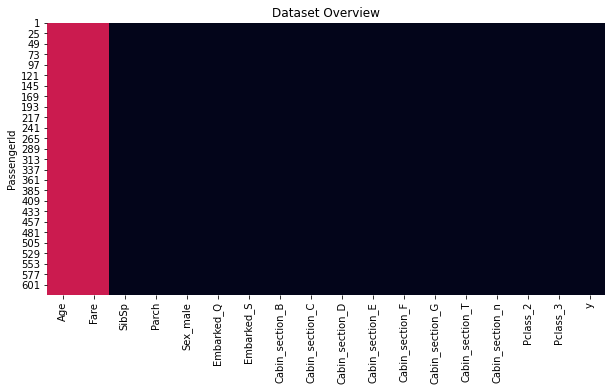

 Categerocial   Numerical   NaN 


In [59]:
dtf_overview(dtf_train)

## Modeling

--- model used ---
RandomForestClassifier(criterion='entropy', random_state=0)


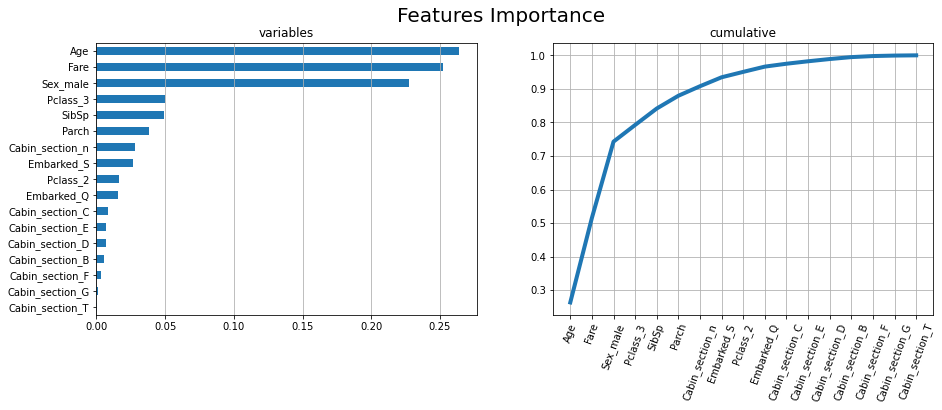

In [60]:
model = ensemble.RandomForestClassifier(n_estimators=100, criterion="entropy", random_state=0)

feat_imp = features_importance(X=dtf_train.drop("y", axis=1).values, y=dtf_train["y"].values,
                              X_names=dtf_train.drop("y", axis=1).columns.tolist(),
                              model = model, task="classification", figsize=(15, 5))

In [61]:
X_names = ["Age", "Fare", "Sex_male", "SibSp", "Pclass_3", "Parch", 
           "Cabin_section_n", "Embarked_S", "Pclass_2",
          "Cabin_section_F", "Cabin_section_E", "Cabin_section_D"]

### Final Model Design

In [62]:
x_train = dtf_train[X_names].values
y_train = dtf_train["y"].values

In [63]:
model = ensemble.GradientBoostingClassifier()

In [64]:
param_dic = {'learning_rate':[0.15,0.1,0.05,0.01,0.005,0.001],      #weighting factor for the corrections by new trees when added to the model
             'n_estimators':[100,250,500,750,1000,1250,1500,1750],  #number of trees added to the model
             'max_depth':[2,3,4,5,6,7],                             #maximum depth of the tree
             'min_samples_split':[2,4,6,8,10,20,40,60,100],         #sets the minimum number of samples to split
             'min_samples_leaf':[1,3,5,7,9],                        #the minimum number of samples to form a leaf
             'max_features':[2,3,4,5,6,7],                          #square root of features is usually a good starting point
             'subsample':[0.7,0.75,0.8,0.85,0.9,0.95,1]}            #the fraction of samples to be used for fitting the individual base learners. Values lower than 1 generally lead to a reduction of variance and an increase in bias.

--- RandomSearch ---
Best Model parameters: {'subsample': 0.75, 'n_estimators': 750, 'min_samples_split': 8, 'min_samples_leaf': 5, 'max_features': 7, 'max_depth': 7, 'learning_rate': 0.005}
Best Model accuracy: 0.85

--- Kfold Validation ---
accuracy mean - base model: 0.82  --> best model: 1
precision mean - base model: 0.81  --> best model: 1
recall mean - base model: 0.71  --> best model: 1
f1 mean - base model: 0.75  --> best model: 1


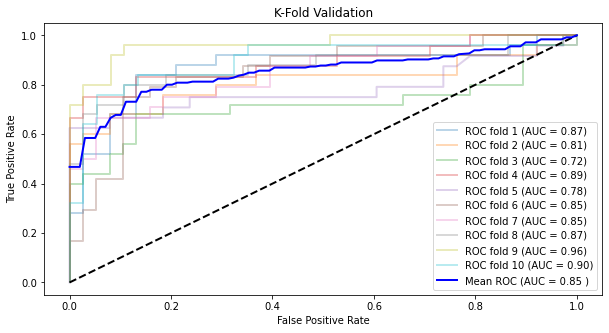


--- Threshold Selection ---
accuracy --> best threshold: 0.6
precision --> best threshold: 0.9
recall --> best threshold: 0.1
f1 --> best threshold: 0.3


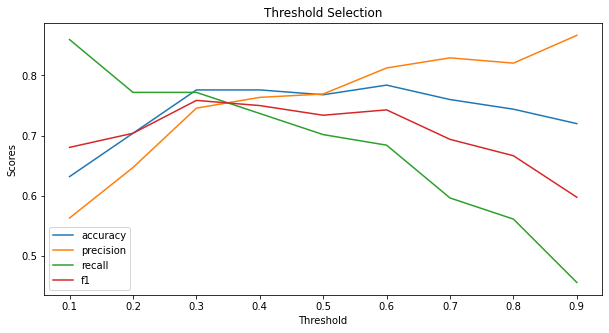

In [65]:
model = tune_classif_model(x_train, y_train, model, param_dic, scoring="accuracy", 
                          searchtype="RandomSearch", n_iter=1000, cv=10, figsize=(10, 5))

<Figure size 432x288 with 0 Axes>